In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta,date
%matplotlib inline

In [2]:
data_table = pd.read_csv("turnstile_190831.txt", parse_dates=[[6,7]])
data_table

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS
0,2019-08-24 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7176756,2430372
1,2019-08-24 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7176772,2430375
2,2019-08-24 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7176786,2430408
3,2019-08-24 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7176862,2430481
4,2019-08-24 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7177008,2430520
5,2019-08-24 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7177221,2430563
6,2019-08-25 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7177326,2430585
7,2019-08-25 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7177337,2430588
8,2019-08-25 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7177347,2430606
9,2019-08-25 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7177421,2430646


In [3]:
def readfiles(file):
    df.merge(pd.read_csv)

## Data Overview

In [4]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205263 entries, 0 to 205262
Data columns (total 10 columns):
DATE_TIME                                                               205263 non-null datetime64[ns]
C/A                                                                     205263 non-null object
UNIT                                                                    205263 non-null object
SCP                                                                     205263 non-null object
STATION                                                                 205263 non-null object
LINENAME                                                                205263 non-null object
DIVISION                                                                205263 non-null object
DESC                                                                    205263 non-null object
ENTRIES                                                                 205263 non-null int64
EXITS                      

In [5]:
data_table.describe()

,ENTRIES,EXITS
count,2.052630e+05,2.052630e+05
mean,4.236181e+07,3.498673e+07
std,2.161598e+08,1.999240e+08
min,0.000000e+00,0.000000e+00
25%,2.863975e+05,1.247700e+05
50%,2.066203e+06,1.179877e+06
75%,6.640564e+06,4.554985e+06
max,2.129132e+09,2.123825e+09


### Find NaN values
In Entries column; "RECOVR AUD" entry: refers to a missed audit that was recovered. 

In [6]:
data_table.isnull().any()

DATE_TIME                                                               False
C/A                                                                     False
UNIT                                                                    False
SCP                                                                     False
STATION                                                                 False
LINENAME                                                                False
DIVISION                                                                False
DESC                                                                    False
ENTRIES                                                                 False
EXITS                                                                   False
dtype: bool

In [7]:
data_table.isnull().sum()

DATE_TIME                                                               0
C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [8]:
entires=data_table.ENTRIES.apply(lambda x: str(x).find('RECOVR AUD'))
entires.unique()

array([-1])

#### The dataset don't have NaN values nor RECOVER AUD situation so it's clean

How many Occurances of station which appears that 34 ST-PENN STA has the highest traffic rate


In [ ]:
data_table.STATION.value_counts().sort_values()

SUTTER AV            83
CLEVELAND ST         84
AVENUE X            123
KOSCIUSZKO ST       123
ALABAMA AV          123
WESTCHESTER SQ      124
25 AV               125
BURKE AV            125
88 ST               126
YORK ST             126
VAN SICLEN AVE      126
MONTROSE AV         126
ALLERTON AV         126
GATES AV            126
SHEPHERD AV         126
KINGSTON AV         126
CORTELYOU RD        126
HARLEM 148 ST       126
219 ST              126
INTERVALE AV        126
BEVERLEY ROAD       126
NEW LOTS            126
NEPTUNE AV          126
STERLING ST         126
CYPRESS HILLS       126
BAY 50 ST           126
ATLANTIC AV         126
LIBERTY AV          126
BROAD CHANNEL       126
MORRIS PARK         126
                   ... 
34 ST-HUDSON YD    1260
LEXINGTON AV/53    1343
WTC-CORTLANDT      1470
47-50 STS ROCK     1512
50 ST              1512
JAY ST-METROTEC    1512
161/YANKEE STAD    1512
CHURCH AV          1545
96 ST              1559
CORTLANDT ST       1629
28 ST           

### Most crowded SCP (based on commulative entry & exit register value)

In [ ]:
eee=data_table.groupby('SCP').count().sort_values('ENTRIES',ascending=False)
print(eee.head())

          DATE_TIME    C/A   UNIT  STATION  LINENAME  DIVISION   DESC  \
SCP                                                                     
00-00-00      19419  19419  19419    19419     19419     19419  19419   
00-00-01      19152  19152  19152    19152     19152     19152  19152   
00-00-02      17156  17156  17156    17156     17156     17156  17156   
00-00-03       8637   8637   8637     8637      8637      8637   8637   
00-03-00       7293   7293   7293     7293      7293      7293   7293   

          ENTRIES  \
SCP                 
00-00-00    19419   
00-00-01    19152   
00-00-02    17156   
00-00-03     8637   
00-03-00     7293   

          EXITS                                                                 
SCP                                                                             
00-00-00                                              19419                     
00-00-01                                              19152                     
00-00-02        

In [ ]:
def getRealvistorsnumber(list1):
    newlist=[]
    base = list1[0]
    for i in range(0 , len(list1)):
        result = list1[i]-base
        if result < 0 :
            base = list1[i]
            newlist.append(list1[i])
        else:
            newlist.append(result)
    return newlist    
  

In [ ]:
print(getRealvistorsnumber(data_table.ENTRIES.tolist()))

[0, 16, 30, 106, 252, 465, 570, 581, 591, 665, 769, 921, 986, 993, 1024, 1135, 1340, 1947, 2084, 2099, 2143, 2258, 2492, 3052, 3226, 3227, 3261, 3393, 3634, 4210, 4295, 4295, 4320, 4452, 4713, 5269, 5392, 5394, 5428, 5510, 5870, 6316, 6386448, 13, 25, 120, 261, 437, 512, 530, 536, 594, 710, 825, 912, 918, 940, 1052, 1233, 1726, 1854, 1862, 1888, 2019, 2248, 2765, 2906, 2908, 2941, 3092, 3314, 3840, 3929, 3929, 3947, 4061, 4311, 4784, 4878, 4879, 4903, 4981, 5332, 5771, 1276785, 9, 20, 89, 230, 372, 450, 461, 467, 545, 645, 785, 852, 856, 869, 921, 1052, 1283, 1376, 1382, 1397, 1443, 1562, 1845, 1925, 1925, 1938, 2004, 2124, 2375, 2411, 2413, 2426, 2474, 2580, 2842, 2937, 2940, 2952, 3015, 3174, 3375, 1224324, 40, 80, 311, 663, 1076, 1372, 1413, 1448, 1651, 1987, 2368, 2600, 2630, 2699, 2920, 3241, 3887, 4146, 4179, 4234, 4417, 4747, 5376, 5631, 5634, 5687, 5870, 6203, 6826, 6957, 6958, 7005, 7226, 7546, 8206, 8518, 8552, 8593, 8803, 9238, 9724, 5086974, 5087004, 5087041, 5087228, 50875

In [ ]:
data_table['new ENTRIES']=getRealvistorsnumber(data_table.ENTRIES.tolist())
data_table

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,new ENTRIES
0,2019-08-24 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7176756,2430372,0
1,2019-08-24 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7176772,2430375,16
2,2019-08-24 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7176786,2430408,30
3,2019-08-24 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7176862,2430481,106
4,2019-08-24 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7177008,2430520,252
5,2019-08-24 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7177221,2430563,465
6,2019-08-25 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7177326,2430585,570
7,2019-08-25 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7177337,2430588,581
8,2019-08-25 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7177347,2430606,591
9,2019-08-25 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7177421,2430646,665


###  Top crowded stations 

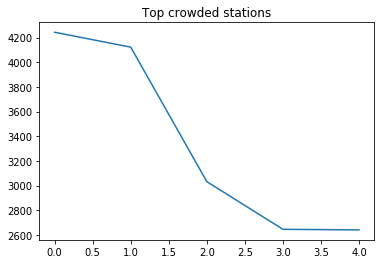

In [ ]:
xyz = list(data_table.STATION.value_counts().head(5))
zyx=list(range(0,data_table["STATION"].count()))
plt.plot(xyz)
plt.title('Top crowded stations');


#plt.barh(xyz,zyx,height=0.2);

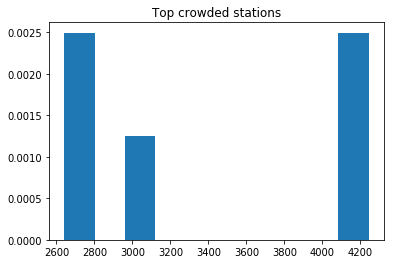

In [ ]:
plt.hist(data_table.STATION.value_counts().head(5),bins =10, density=True)
plt.title('Top crowded stations');

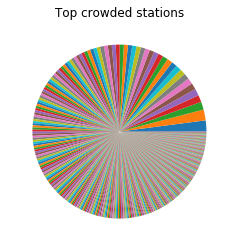

In [ ]:
plt.pie(data_table.STATION.value_counts())
plt.title('Top crowded stations');

Text(0.5, 0, 'Frequency')

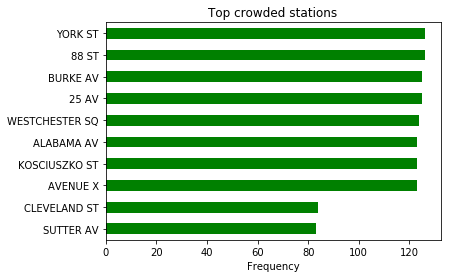

In [ ]:
#Plot a histogram of frequencies
data_table.STATION.value_counts().sort_values().head(10).plot(kind='barh',color='green')
plt.title('Top crowded stations')
plt.xlabel('Frequency')

In [ ]:
#pie chart
data_table['new ENTRIES'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Number of appearances in dataset')

### Most Crowded Time "Find patterns" (based on time & commulative entry & exit register value)

### Most crowded station name (based on commulative entry & exit register value)
Focus on new york residents not tourists (exit not entry)